In [1]:
import os
from os.path import isfile, join
import pandas as pd
import numpy as np
from prep_image import prep_im_and_mask
import matplotlib.pyplot as plt

#from sklearn.feature_selection import VarianceTreshold
from sklearn.feature_selection import SelectKBest,mutual_info_classif,f_regression
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


NameError: name 'feature_df' is not defined

In [3]:
feature_data = "feature_data.csv"
feature_df = pd.read_csv(feature_data)
metadata = "metadata.csv"
df = pd.read_csv(metadata)
feature_df

,assymmetry,red_var,green_var,blue_var,hue_var,sat_var,val_var,dom_hue,dom_sat,dom_val,compactness,convexity
0,0.26320,0.003983,0.005535,0.002974,0.000039,0.004124,0.003994,0.07960,0.52600,0.6470,0.740,0.019
1,0.17700,0.002228,0.014560,0.020320,0.002674,0.022110,0.002300,0.01950,0.25320,0.6553,0.808,0.080
2,0.09320,0.000475,0.000585,0.000205,0.000032,0.001285,0.000469,0.00843,0.46100,0.6260,0.746,0.062
3,0.14560,0.000908,0.001380,0.002495,0.000319,0.002718,0.000908,0.02519,0.44850,0.4863,0.762,0.079
4,0.11060,0.000154,0.000090,0.000099,0.000092,0.000372,0.000160,0.08105,0.24170,0.4028,0.721,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.10150,0.003054,0.005962,0.004852,0.000203,0.006660,0.003050,0.01508,0.33960,0.5923,0.727,0.019
88,0.04030,0.019040,0.016170,0.016100,0.000550,0.025130,0.019030,0.97200,0.69340,0.3518,0.720,0.017
89,0.16860,0.002690,0.004105,0.005856,0.003717,0.002617,0.003012,0.24000,0.03973,0.6343,0.774,0.088
90,0.12146,0.003153,0.012910,0.022500,0.008026,0.017500,0.005203,0.94300,0.24820,0.5425,0.781,0.073


In [4]:
file_data = 'metadata_withmasks.csv'
image_folder = 'test_images' + os.sep
mask_folder = 'test_images_masks' + os.sep
file_features = 'feature_data.csv'

In [5]:
# Extract image ids and labels
df = pd.read_csv(file_data)

# Remove images without masks
df_mask = df['mask'] == 1
df = df.loc[df_mask]

labels = list(df['diagnostic'])

In [47]:
scores = SelectKBest(f_classif, k=2).fit_transform(feature_df, labels)
X_train , X_test, y_train, y_test = train_test_split(feature_df, labels, 
                                                     test_size = 0.30, 
                                                     random_state = 42)


type(feature_df)

pandas.core.frame.DataFrame

In [48]:
#find which are importtant. to filter use selectkbest
Feature_df_new = SelectKBest(mutual_info_classif, k=k)
Feature_df_new.fit_transform(X_train, y_train)


array([[4.1540e-03, 6.5800e-03, 8.0630e-04, 5.5080e-02],
       [3.8180e-02, 3.0730e-02, 3.2840e-02, 4.0600e-02],
       [4.6770e-03, 2.2830e-03, 3.2480e-03, 9.5560e-01],
       [1.2280e-03, 6.9920e-03, 3.1900e-03, 5.6240e-02],
       [1.6690e-03, 1.3090e-03, 5.1700e-04, 4.9620e-02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 5.2600e-02],
       [8.1000e-03, 1.2170e-02, 3.1070e-03, 1.7560e-02],
       [5.2070e-03, 8.1200e-03, 1.1820e-03, 2.2130e-02],
       [2.3630e-03, 1.2270e-03, 2.5520e-03, 9.3800e-03],
       [3.3230e-03, 5.7950e-03, 1.4750e-03, 6.1370e-02],
       [3.7860e-03, 4.3680e-03, 2.1820e-03, 9.6700e-01],
       [1.2570e-02, 2.8230e-03, 9.9600e-03, 4.4040e-02],
       [2.3400e-03, 4.0470e-03, 3.0520e-04, 2.5960e-02],
       [4.6460e-03, 5.4170e-03, 8.6900e-03, 3.2560e-02],
       [1.3075e-03, 1.0210e-03, 1.2600e-03, 9.3300e-01],
       [1.1345e-02, 5.5700e-03, 4.8300e-03, 1.4620e-02],
       [2.8340e-03, 9.1200e-03, 1.5190e-03, 2.5340e-02],
       [4.9170e-03, 5.8200e-03,

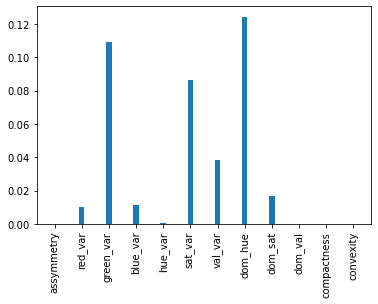

In [60]:
scores, selector = feature_scores(X_train, y_train, 2)

# Get no. of features
features = len(scores)

# Visualize feature scores
plt.bar(np.arange(0,features), scores, width=.2)
plt.xticks(np.arange(0,features), list(X_train.columns), rotation='vertical')
plt.show()

# Select the two best features based on the selector
#X_train_ker_adj = selector_ker.transform(X_train_ker)
#X_test_ker_adj = selector_ker.transform(X_test_ker)

In [53]:
def feature_scores(X_train, y_train, k):
    feature_selector = SelectKBest(mutual_info_classif, k=k)
    feature_selector.fit_transform(X_train, y_train)
    
    scores = feature_selector.scores_
    
    return scores, selector
    
feature_scores(X_train,y_train,2)
    

(array([0.        , 0.00988516, 0.10664649, 0.01246454, 0.00126296,
        0.0956514 , 0.03851783, 0.1243913 , 0.01688874, 0.        ,
        0.        , 0.        ]),
 SelectKBest(k=3, score_func=<function mutual_info_classif at 0x7fee8c4a7280>))

In [58]:
scores, selector = feature_scores(X_train,y_train,2)

def plot_feature_scores(scores, X_train):
    # Get no. of features
    features = len(scores)

    # Visualize feature scores
    plt.bar(np.arange(0,features), feature_scores, width=.2)
    plt.xticks(np.arange(0,features), list(X_train.columns), rotation='vertical')
    plt.show()

plot_feature_scores(feature_scores, X_train)

TypeError: object of type 'function' has no len()

array([[0.004154 , 0.00789  ],
       [0.03818  , 0.03464  ],
       [0.004677 , 0.004604 ],
       [0.001228 , 0.001116 ],
       [0.001669 , 0.002167 ],
       [0.       , 0.       ],
       [0.0081   , 0.00909  ],
       [0.005207 , 0.006374 ],
       [0.002363 , 0.001854 ],
       [0.00337  , 0.005146 ],
       [0.003786 , 0.00819  ],
       [0.01257  , 0.01515  ],
       [0.00234  , 0.001919 ],
       [0.004646 , 0.00401  ],
       [0.0013075, 0.002378 ],
       [0.011345 , 0.01646  ],
       [0.002834 , 0.005665 ],
       [0.004917 , 0.0063   ],
       [0.01535  , 0.01608  ],
       [0.00138  , 0.002495 ],
       [0.008766 , 0.00959  ],
       [0.       , 0.       ],
       [0.0007772, 0.0008225],
       [0.0007215, 0.0008597],
       [0.01142  , 0.01058  ],
       [0.01617  , 0.0161   ],
       [0.004025 , 0.004906 ],
       [0.01598  , 0.01625  ],
       [0.0113   , 0.00966  ],
       [0.008606 , 0.007797 ],
       [0.01675  , 0.01029  ],
       [0.00756  , 0.004505 ],
       [